In [14]:
# 라이브러리 세팅 및 seaborn 한글 패치
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("sample_submission.csv")

In [3]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [4]:
test

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [5]:
train.dtypes

일시       object
최고기온    float64
최저기온    float64
일교차     float64
강수량     float64
평균습도    float64
평균풍속    float64
일조합     float64
일사합     float64
일조율     float64
평균기온    float64
dtype: object

In [6]:
train.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
최고기온,23008.0,17.071714,10.714471,-13.6,7.8,18.90,26.40,39.60
최저기온,23008.0,8.451960,10.578285,-20.2,-0.3,9.20,17.90,30.30
일교차,23007.0,8.619277,2.907096,1.0,6.6,8.60,10.60,19.60
강수량,9150.0,9.593683,21.966135,0.0,0.1,1.40,8.50,332.80
평균습도,23011.0,65.202851,14.549077,17.9,54.9,65.50,75.80,99.80
평균풍속,23007.0,2.380993,0.947595,0.1,1.7,2.20,2.90,7.80
일조합,22893.0,5.858826,3.816941,0.0,2.2,6.60,9.00,13.70
일사합,18149.0,11.933170,6.419122,0.0,7.0,11.22,16.62,33.48
일조율,22645.0,48.653526,31.662321,0.0,17.8,55.70,78.00,96.90
평균기온,23011.0,12.415419,10.489515,-16.4,3.4,13.80,21.80,33.70


In [8]:
train_copy = train.copy(deep=True)

array([[<Axes: title={'center': '최고기온'}>,
        <Axes: title={'center': '최저기온'}>,
        <Axes: title={'center': '일교차'}>],
       [<Axes: title={'center': '강수량'}>,
        <Axes: title={'center': '평균습도'}>,
        <Axes: title={'center': '평균풍속'}>],
       [<Axes: title={'center': '일조합'}>, <Axes: title={'center': '일사합'}>,
        <Axes: title={'center': '일조율'}>],
       [<Axes: title={'center': '평균기온'}>, <Axes: >, <Axes: >]],
      dtype=object)

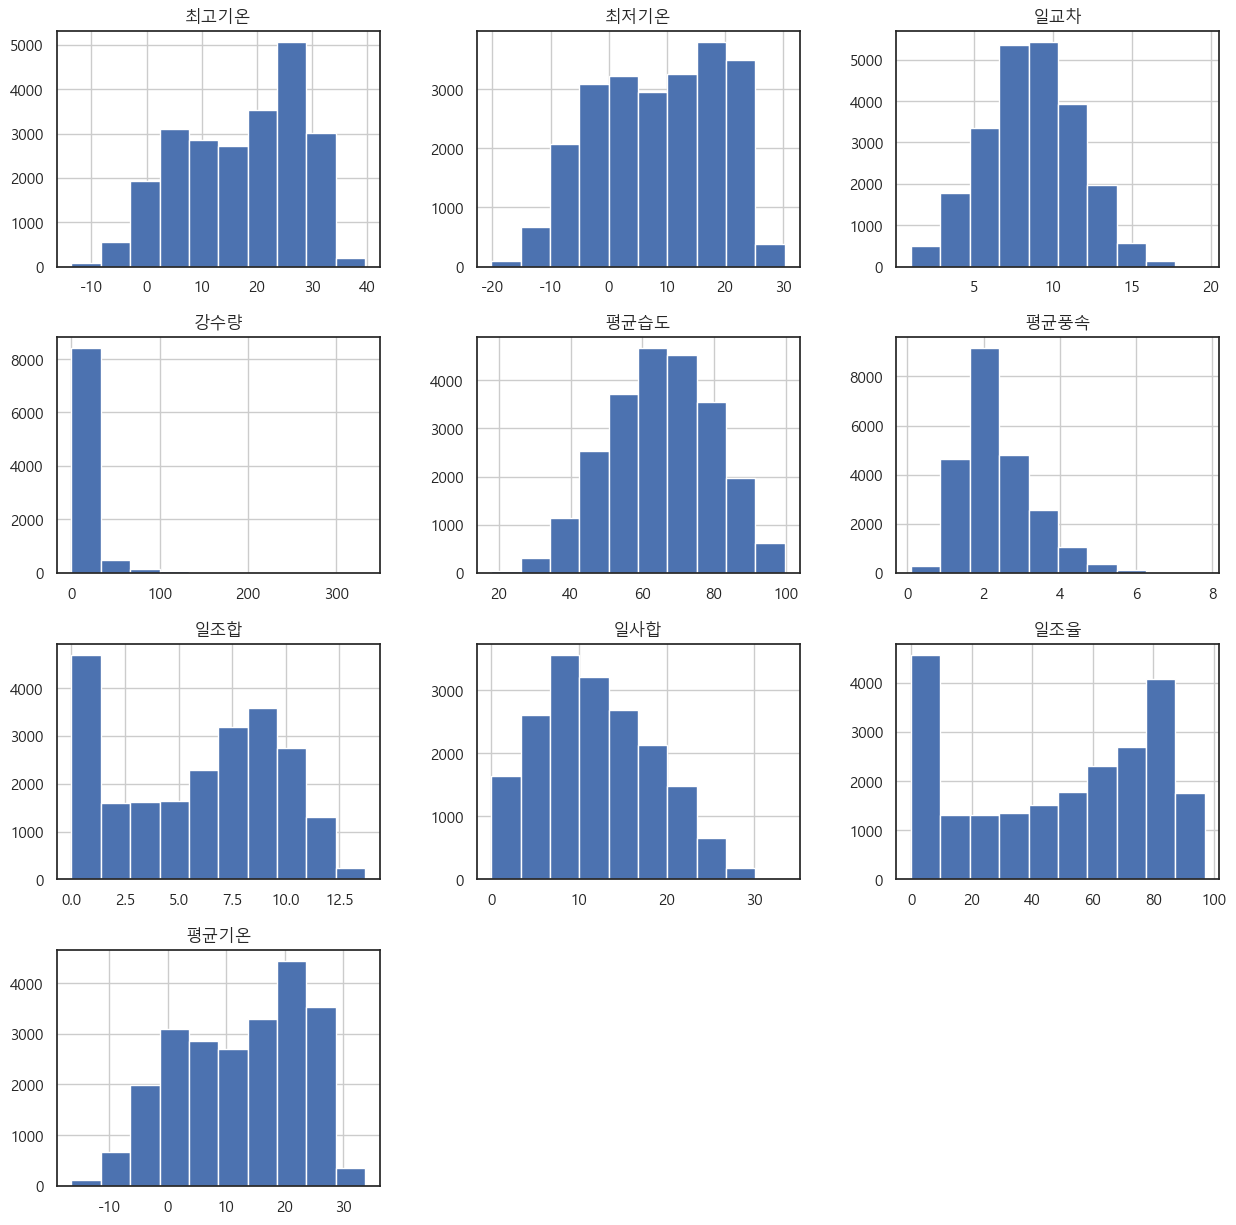

In [9]:
train_copy.hist(figsize=(15,15))

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온 

In [10]:
train_copy["최고기온"].fillna(train_copy["최고기온"].bfill(), inplace=True)
train_copy["최저기온"].fillna(train_copy["최저기온"].bfill(), inplace=True)
train_copy["일교차"].fillna(train_copy["일교차"].bfill(), inplace=True)
train_copy["평균풍속"].fillna(train_copy["평균풍속"].bfill(), inplace=True)
train_copy["일조합"].fillna(train_copy["일조합"].bfill(), inplace = True)
train_copy["일사합"].fillna(train_copy["일사합"].bfill(), inplace=True)
train_copy["일조율"].fillna(train_copy["일조율"].bfill(), inplace=True)
train_copy["강수량"].fillna(train_copy["강수량"].bfill(), inplace=True)

In [11]:
train_copy.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

array([[<Axes: title={'center': '최고기온'}>,
        <Axes: title={'center': '최저기온'}>,
        <Axes: title={'center': '일교차'}>],
       [<Axes: title={'center': '강수량'}>,
        <Axes: title={'center': '평균습도'}>,
        <Axes: title={'center': '평균풍속'}>],
       [<Axes: title={'center': '일조합'}>, <Axes: title={'center': '일사합'}>,
        <Axes: title={'center': '일조율'}>],
       [<Axes: title={'center': '평균기온'}>, <Axes: >, <Axes: >]],
      dtype=object)

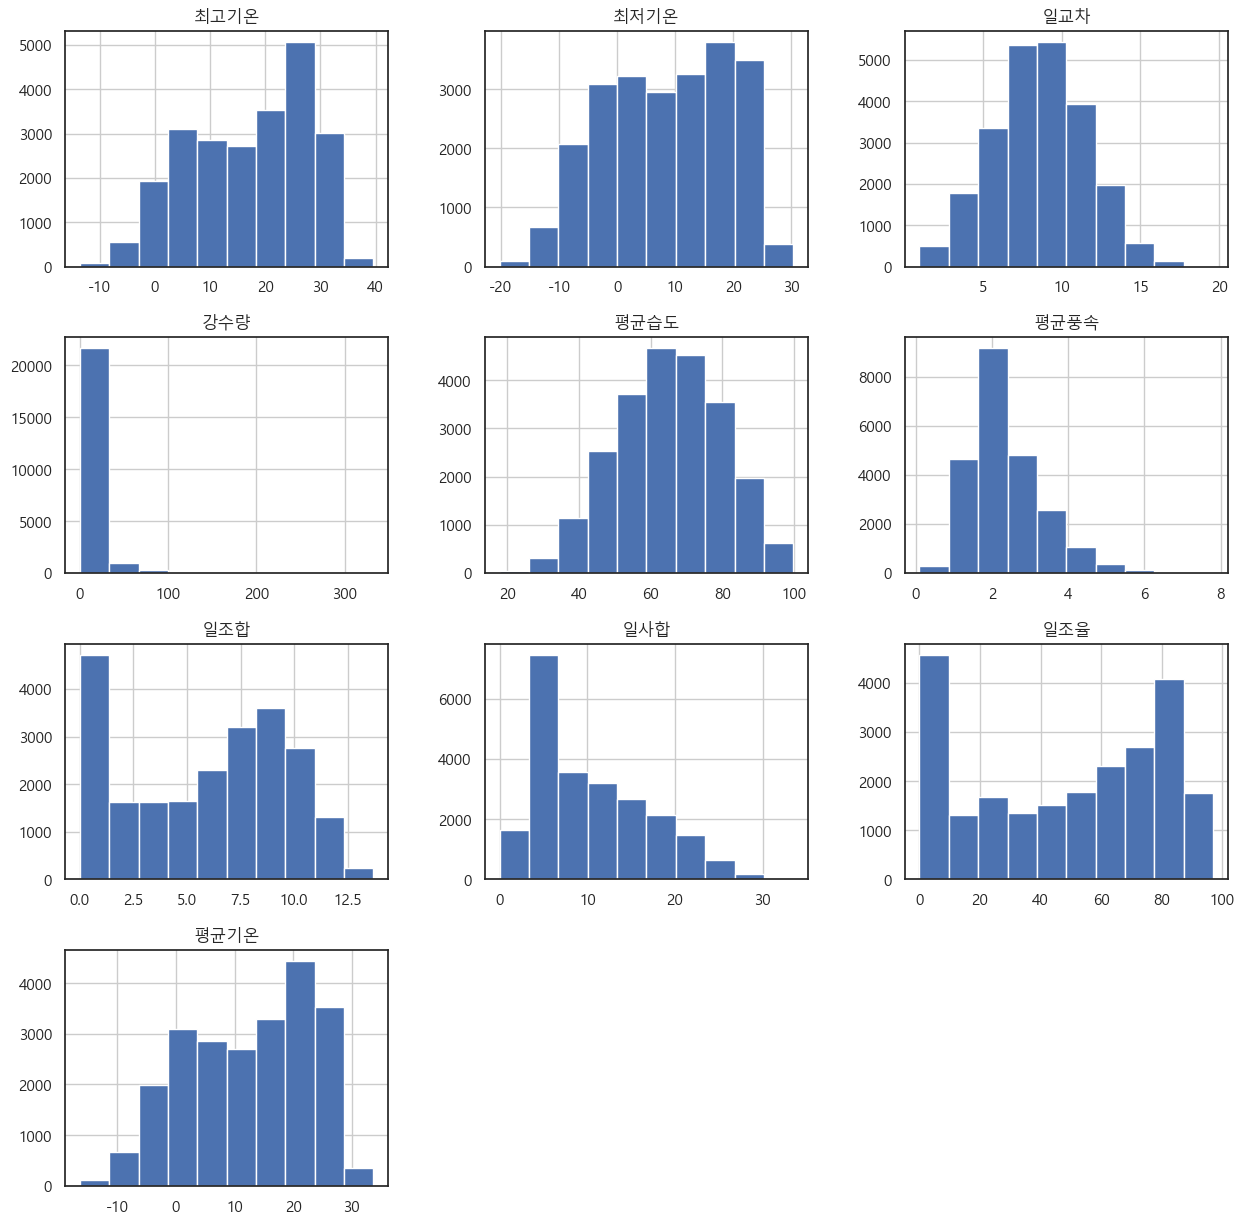

In [12]:
train_copy.hist(figsize=(15,15))

In [16]:
train_copy.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,17.071257,8.452001,8.619291,7.395932,65.202851,2.380900,5.857694,10.432268,48.326613,12.415419
std,10.714039,10.578244,2.907101,17.261952,14.549077,0.947545,3.815408,6.402752,31.514588,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.000000,54.900000,1.700000,2.200000,4.810000,18.600000,3.400000
50%,18.900000,9.200000,8.600000,1.000000,65.500000,2.200000,6.600000,9.020000,54.700000,13.800000
75%,26.400000,17.900000,10.600000,6.500000,75.800000,2.900000,9.000000,15.040000,77.750000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [23]:
train_copy

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [26]:
train_heatmap = train_copy.drop(["일시"], axis=1)

<Axes: >

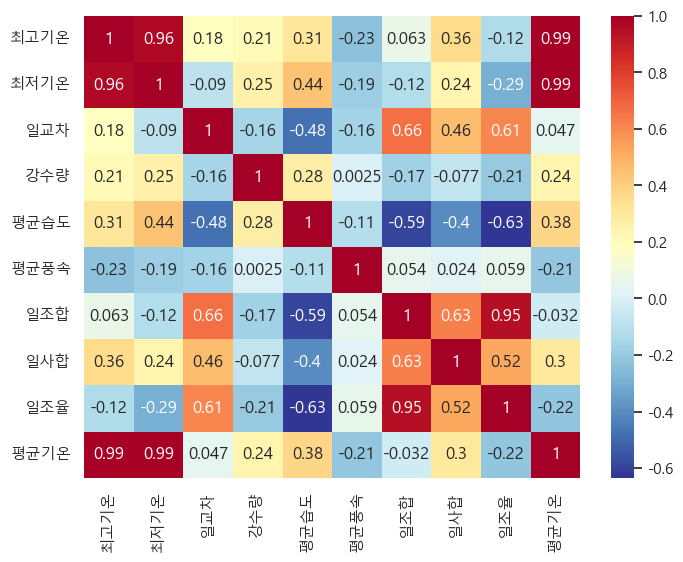

In [27]:
plt.figure(figsize = (8,6))
sns.heatmap(train_heatmap.corr(), annot=True, cmap = 'RdYlBu_r')